# Module 1 Final Project Submission

* Student name: Noah X. Deutsch
* Student pace: Self Paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Project Objective

The goal of this project is to clean, explore, and model the **King County House Sales** dataset with a multivariate linear regression to **predict the sale price of houses as accurately as possible.**

## My Approach (OSEMiN)

### Obtain
* Import Data File
* Familiarize myself with the dataset

### Scrub
* Subsampling to Reduce Size (as needed)
* Ensure Appropriate Column Data Types
* Deal With Null Values
* Checking For Multicollinearity
* Normalizing Numerical Data 
* One-Hot Encode Categorical Data 

### Explore
* Understand the Distribution (Hist + KDE, Joint Plots)
* Check for the linearity assumption between predictors and target variable

### Model
* Fit single regression models for each continuous variable and refine.
* Fit regression models for each group of categorical variables and refine.
* Check Multicollinearity, Normality, and Homoscedasticity and refine.
* Use recursive feature elimination and cross validation to protect against overfitting. 

### iNterpret
* What does this all mean?

# Step 1. Obtain

### Column Names and descriptions for Kings County Data Set (from the included column_names.md file)
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [463]:
#Loading in some key packages to be used throughout the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [464]:
# Obtaining our data set
kcdf = pd.read_csv('kc_house_data.csv')

In [465]:
#Taking an look look at rows and columns
kcdf.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [466]:
#Understanding shape and current column data types
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [467]:
#Looking at descriptive statistics
kcdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [468]:
uniqueValues = kcdf.nunique()
uniqueValues

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

# Step 2. Scrub
* Subsampling to Reduce Size (as needed)
* Ensure Appropriate Column Data Types
* Deal With Null Values
* Checking For Multicollinearity
* Normalizing Numerical Data 
* One-Hot Encode Categorical Data 

### Subsampling to Reduce Size

In [469]:
len(kcdf)

21597

In [470]:
#Subsampling not needed. Dataset is already a managable size.

### Ensure Appropriate Column Data Types

#### Let's start by tagging the columns in advance by which datatype they should be. Then we can compare to how they are currently.
* **id** - unique identified for a house **––– CUT, not useful to model**
* **dateDate** - house was sold **––– STR**
* **pricePrice** -  is prediction target **––– NUM**
* **bedroomsNumber** -  of Bedrooms/House **––– NUM**
* **bathroomsNumber** -  of bathrooms/bedrooms **––– NUM**
* **sqft_livingsquare** -  footage of the home **––– NUM**
* **sqft_lotsquare** -  footage of the lot **––– NUM**
* **floorsTotal** -  floors (levels) in house **––– NUM**
* **waterfront** - House which has a view to a waterfront **––– CAT**
* **view** - Has been viewed **––– CAT**
* **condition** - How good the condition is ( Overall ) **––– UNSURE, explore**
* **grade** - overall grade given to the housing unit, based on King County grading system **––– UNSURE, explore**
* **sqft_above** - square footage of house apart from basement **––– NUM**
* **sqft_basement** - square footage of the basement **––– NUM**
* **yr_built** - Built Year **––– NUM** 
* **yr_renovated** - Year when house was renovated **––– NUM**
* **zipcode** - zip **––– CAT**
* **lat** - Latitude coordinate **––– NUM**
* **long** - Longitude coordinate **––– NUM**
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors **––– NUM**
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors **––– NUM**

In [471]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


#### Actions to take

id               CUT

date             KEEP

price            KEEP

bedrooms         KEEP

bathrooms        KEEP

sqft_living      KEEP

sqft_lot         KEEP

floors           KEEP

waterfront       MODIFY

view             MODIFY

condition        EXPLORE

grade            EXPLORE

sqft_above       KEEP

sqft_basement    MODIFY

yr_built         KEEP

yr_renovated     KEEP

zipcode          MODIFY

lat              KEEP

long             KEEP

sqft_living15    KEEP

sqft_lot15       KEEP

In [472]:
#Let's start by dropping the ID collumn 
kcdf = kcdf.drop(['id'],axis=1)
kcdf.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [473]:
#Now let's adjust/explore the rest

#waterfront to string (cat later)
kcdf['waterfront'] = kcdf['waterfront'].astype('str')
kcdf['waterfront'].unique()

array(['nan', '0.0', '1.0'], dtype=object)

In [474]:
#view to string (cat later)
kcdf['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [475]:
#I expected this to be a binary 0 and 1. 
#But since it is actually showing the number of times a space was viewed, we can leave it as numerical for now.

In [476]:
#let's explore condition
kcdf['condition'].unique()

array([3, 5, 4, 1, 2])

In [477]:
#clearly this should be catagorical, since we dont know if there's a clear numerical relationship
#so we'll swtich it to a string for now
kcdf['condition'] = kcdf['condition'].astype('str')
kcdf['condition'].unique()

array(['3', '5', '4', '1', '2'], dtype=object)

In [478]:
#let's explore condition
kcdf['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [479]:
#this should be catagorical, since we dont know if there's a clear numerical relationship.
#so we'll swtich it to a string for now
kcdf['grade'] = kcdf['grade'].astype('str')
kcdf['grade'].unique()

array(['7', '6', '8', '11', '9', '5', '10', '12', '4', '3', '13'],
      dtype=object)

In [480]:
kcdf['sqft_basement'].head(10)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         ?
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: object

In [481]:
#Looks like all the values can be converted to ints except for a '?' for NaN
#let's see how many of those there are...

countq = kcdf['sqft_basement'].apply(lambda x: True if '?' in list(x) else False)
numOfRows = len(countq[countq == True].index)
numOfRows

454

In [482]:
#Okay, so there are 454 rows with a '?' for sqft_basement. That's roughly 2% of our overall data.
#That's not too bad. So let's go ahead and cut these rows so we can convert the rest to int.
initial_length = len(kcdf)
kcdf = kcdf.loc[kcdf["sqft_basement"] != '?']
adjusted_length = len(kcdf)
initial_length - adjusted_length


454

In [483]:
#Now we can safely convert the column to ints
kcdf['sqft_basement'] = kcdf['sqft_basement'].astype(np.float16)
kcdf['sqft_basement'] = kcdf['sqft_basement'].astype(int)
kcdf['sqft_basement'].unique()

array([   0,  400,  910, 1530,  730, 1700,  300,  970,  760,  720,  700,
        820,  780,  790,  330, 1620,  360,  588, 1510,  410,  990,  600,
        560,  550, 1000, 1600,  500, 1040,  880, 1010,  240,  265,  290,
        800,  540,  710,  840,  380,  770,  480,  570, 1490,  620, 1250,
       1270,  120,  650,  180, 1130,  450, 1640, 1460, 1020, 1030,  750,
        640, 1070,  490, 1310,  630, 2000,  390,  430,  850,  210, 1430,
       1950,  440,  220, 1160,  860,  580, 2060, 1820, 1180,  200, 1150,
       1200,  680,  530, 1450, 1170, 1080,  960,  280,  870, 1100,  460,
       1400,  660, 1220,  900,  420, 1580, 1380,  475,  690,  270,  350,
        935, 1370,  980, 1470,  160,  950,   50,  740, 1780, 1900,  340,
        470,  370,  140, 1760,  130,  520,  890, 1110,  150, 1720,  810,
        190, 1290,  670, 1800, 1120, 1810,   60, 1050,  940,  310,  930,
       1390,  610, 1830, 1300,  510, 1330, 1590,  920, 1320, 1420, 1240,
       1960, 1560, 2020, 1190, 2110, 1280,  250, 23

In [484]:
#Last up, zipcode. This needs to be categorical
kcdf['zipcode'] = kcdf['zipcode'].astype('str')
kcdf['zipcode'].head()

0    98178
1    98125
2    98028
3    98136
4    98074
Name: zipcode, dtype: object

In [485]:
#Let's do a final check of data types to make sure we're in a good place.

kcdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 20 columns):
date             21143 non-null object
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       21143 non-null object
view             21082 non-null float64
condition        21143 non-null object
grade            21143 non-null object
sqft_above       21143 non-null int64
sqft_basement    21143 non-null int64
yr_built         21143 non-null int64
yr_renovated     17389 non-null float64
zipcode          21143 non-null object
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: float64(7), int64(8), object(5)
memory usage: 3.4+ MB


### Deal With Null Values

In [486]:
#We already took out some null values for sqft_basement

#let's see how many we have left

kcdf.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [487]:
#With only 61 NaN values for view, we can definitely cut those ones out of the data set

initial_length = len(kcdf)
kcdf = kcdf.loc[kcdf["view"] >= 0]
adjusted_length = len(kcdf)
initial_length - adjusted_length

61

In [488]:
#lets take a closer look at year renovated
kcdf['yr_renovated'].describe()

count    17340.000000
mean        83.111419
std        398.756281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [489]:
#In addition to having lots of NAN values...
#We've also got a ton of 0 values, which can be assumed to mean there has been no rennovation.

#lets look at the actual dates...
test = kcdf.loc[kcdf["yr_renovated"] > 0]
test['yr_renovated'].describe()

count     722.000000
mean     1996.055402
std        15.440898
min      1934.000000
25%      1987.000000
50%      2000.000000
75%      2007.750000
max      2015.000000
Name: yr_renovated, dtype: float64

In [490]:
#Based on this, I think it may be best to bin these.
#-----
#No rennovation (including NaNs and 0s) 
#Rennovation1 (1934-1953)
#Rennovation2 (1954-1973)
#Rennovation3 (1974-1993)
#Rennovation4 (1994-2015)

#turn all NaNs to 0s
kcdf['yr_renovated'] = kcdf['yr_renovated'].fillna(0)
kcdf['yr_renovated'].isna().sum()

0

In [491]:
#Now we can bin!

bins = pd.IntervalIndex.from_tuples([(-1,1),(1933, 1953), (1953, 1973), (1973, 1993),(1993, 2016)])
sample = kcdf['yr_renovated']
binned_yr_renovated = pd.cut(sample, bins)
kcdf['binned_yr_renovated'] = binned_yr_renovated

kcdf.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'binned_yr_renovated'],
      dtype='object')

In [492]:
#and lastly, remove the original 'yr_renovated'
kcdf = kcdf.drop(['yr_renovated'],axis=1)
kcdf.columns


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'binned_yr_renovated'],
      dtype='object')

In [493]:
#and let's do a final check before moving on

kcdf.isna().sum()

date                   0
price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront             0
view                   0
condition              0
grade                  0
sqft_above             0
sqft_basement          0
yr_built               0
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
binned_yr_renovated    0
dtype: int64

In [494]:
#Looking great!

### Checking For Multicollinearity


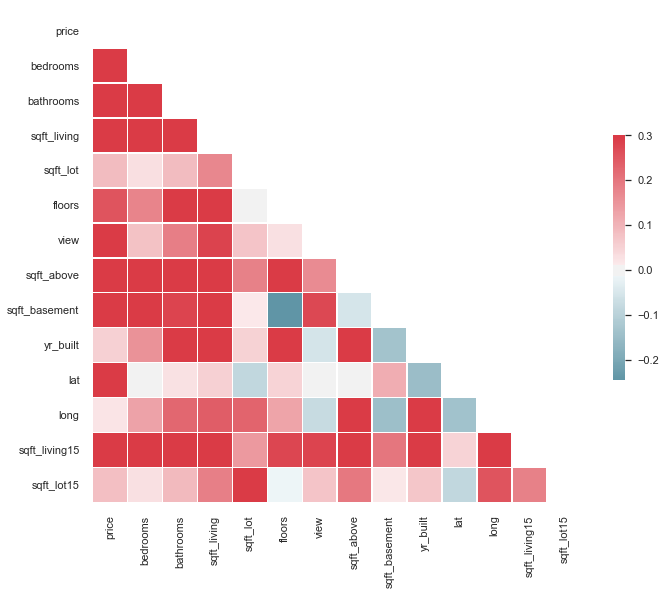

In [495]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Style
sns.set(style="white")

#Covariance matrix
corr = kcdf.corr()

#Generate a mask
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [496]:
#Not too bad! Lot's of weak correlations but nothing problematic. We can proceed.

### Normalizing Numerical Data 


In [497]:
for col in kcdf.columns:
    print (kcdf[col].dtype)

object
float64
int64
float64
int64
int64
float64
object
float64
object
object
int64
int64
int64
object
float64
float64
int64
int64
category


In [498]:
#Zscore normalization for our numerical data
for col in kcdf.columns:
    if col == 'price':
        pass
    elif kcdf[col].dtypes == 'float64':
        kcdf[col] = (kcdf[col] - kcdf[col].mean()) / kcdf[col].std()
    elif kcdf[col].dtypes == 'int64':
        kcdf[col] = (kcdf[col] - kcdf[col].mean()) / kcdf[col].std()
    else:
        print (str(col) + ': dont normalize')


kcdf.head()

date: dont normalize
waterfront: dont normalize
condition: dont normalize
grade: dont normalize
zipcode: dont normalize
binned_yr_renovated: dont normalize


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,binned_yr_renovated
0,10/13/2014,221900.0,-0.402600,-1.452748,-0.980938,-0.228973,-0.915179,nan,-0.304976,3,7,-0.735179,-0.659175,-0.546440,98178,-0.354849,-0.306933,-0.943655,-0.260878,"(-1, 1]"
1,12/9/2014,538000.0,-0.402600,0.174556,0.533460,-0.190307,0.938835,0.0,-0.304976,3,7,0.459940,0.245788,-0.682852,98125,1.159208,-0.747879,-0.433112,-0.187615,"(1973, 1993]"
2,2/25/2015,180000.0,-1.483686,-1.452748,-1.427631,-0.123322,-0.915179,0.0,-0.304976,3,6,-1.230128,-0.659175,-1.296702,98028,1.281170,-0.136245,1.069344,-0.172034,"(-1, 1]"
3,12/9/2014,604000.0,0.678486,1.150938,-0.131132,-0.244760,-0.915179,0.0,-0.304976,5,7,-0.892114,1.399616,-0.205413,98136,-0.285569,-1.274170,-0.914481,-0.284820,"(-1, 1]"
4,2/18/2015,510000.0,-0.402600,-0.150905,-0.436190,-0.169954,-0.915179,0.0,-0.304976,3,8,-0.131584,-0.659175,0.544849,98074,0.407231,1.200818,-0.272656,-0.192624,"(-1, 1]"


In [499]:
#Great! We're ready to move on.

### One-Hot Encode Categorical Data


In [500]:
#before encoding our Cat data, let's go ahead and drop the date column 
#because, as in past examples, we are creating a generalized model and will not be making use of any time series data.

kcdf = kcdf.drop(['date'],axis=1)
kcdf.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'binned_yr_renovated'],
      dtype='object')

In [501]:
kcdf = pd.get_dummies(kcdf)
kcdf.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,...,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,"binned_yr_renovated_(-1, 1]","binned_yr_renovated_(1933, 1953]","binned_yr_renovated_(1953, 1973]","binned_yr_renovated_(1973, 1993]","binned_yr_renovated_(1993, 2016]"
0,221900.0,-0.402600,-1.452748,-0.980938,-0.228973,-0.915179,-0.304976,-0.735179,-0.659175,-0.546440,...,0,1,0,0,0,1,0,0,0,0
1,538000.0,-0.402600,0.174556,0.533460,-0.190307,0.938835,-0.304976,0.459940,0.245788,-0.682852,...,0,0,0,0,0,0,0,0,1,0
2,180000.0,-1.483686,-1.452748,-1.427631,-0.123322,-0.915179,-0.304976,-1.230128,-0.659175,-1.296702,...,0,0,0,0,0,1,0,0,0,0
3,604000.0,0.678486,1.150938,-0.131132,-0.244760,-0.915179,-0.304976,-0.892114,1.399616,-0.205413,...,0,0,0,0,0,1,0,0,0,0
4,510000.0,-0.402600,-0.150905,-0.436190,-0.169954,-0.915179,-0.304976,-0.131584,-0.659175,0.544849,...,0,0,0,0,0,1,0,0,0,0


In [502]:
#all set!
kcdf.iloc[:,0:20].columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'waterfront_0.0', 'waterfront_1.0',
       'waterfront_nan', 'condition_1', 'condition_2', 'condition_3'],
      dtype='object')

# Step 3. Explore
* Understand the Distribution (Hist + KDE, Joint Plots)
* Check for the linearity assumption between predictors and target variable

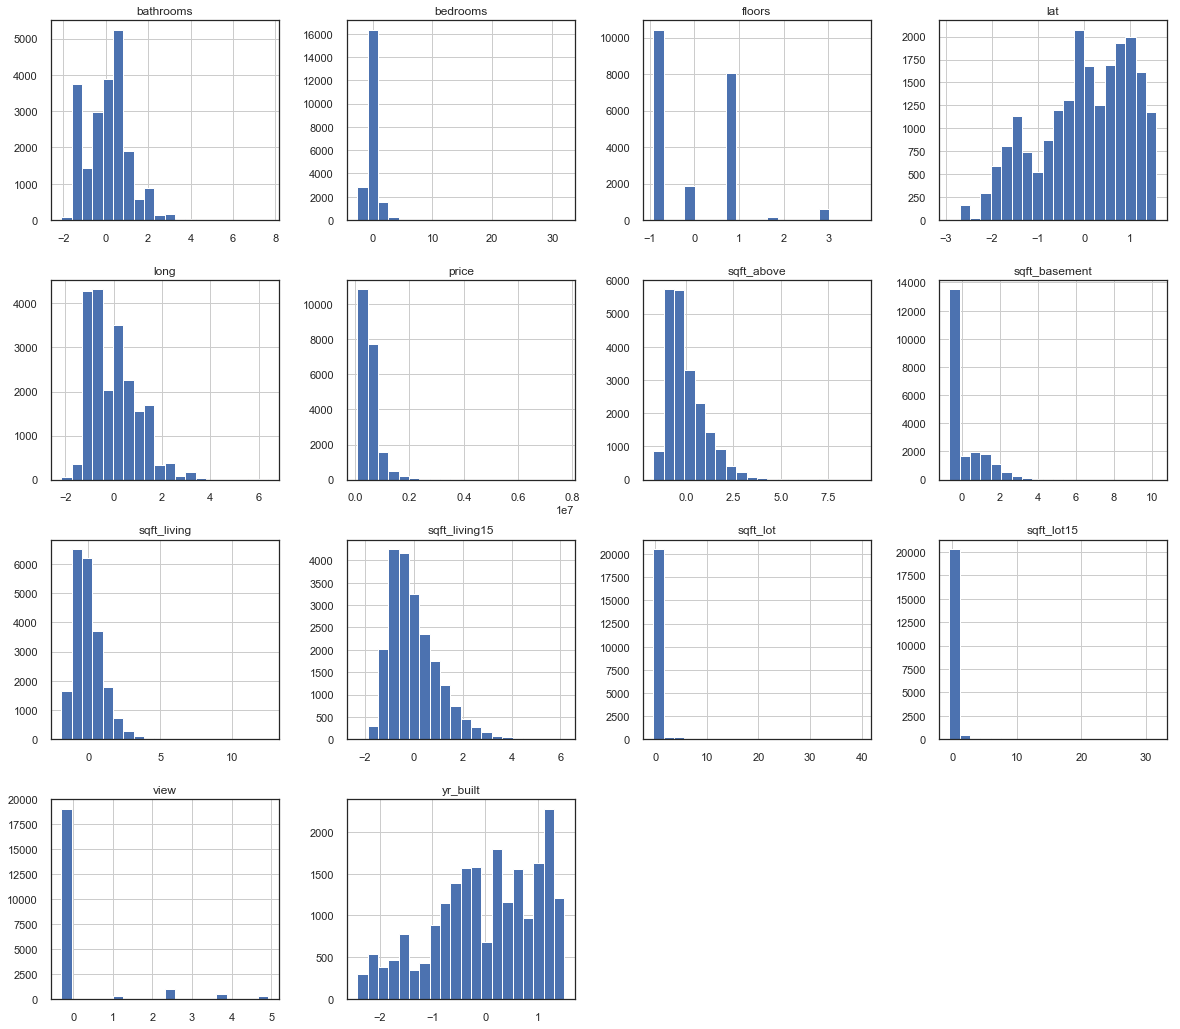

In [503]:
#Let's visualize our cleaned data to get a feel for the distributions (leaving out our cat data)

#How are these predictors distributed?
kcdf.iloc[:,0:14].hist(figsize = (20,18),bins=20);

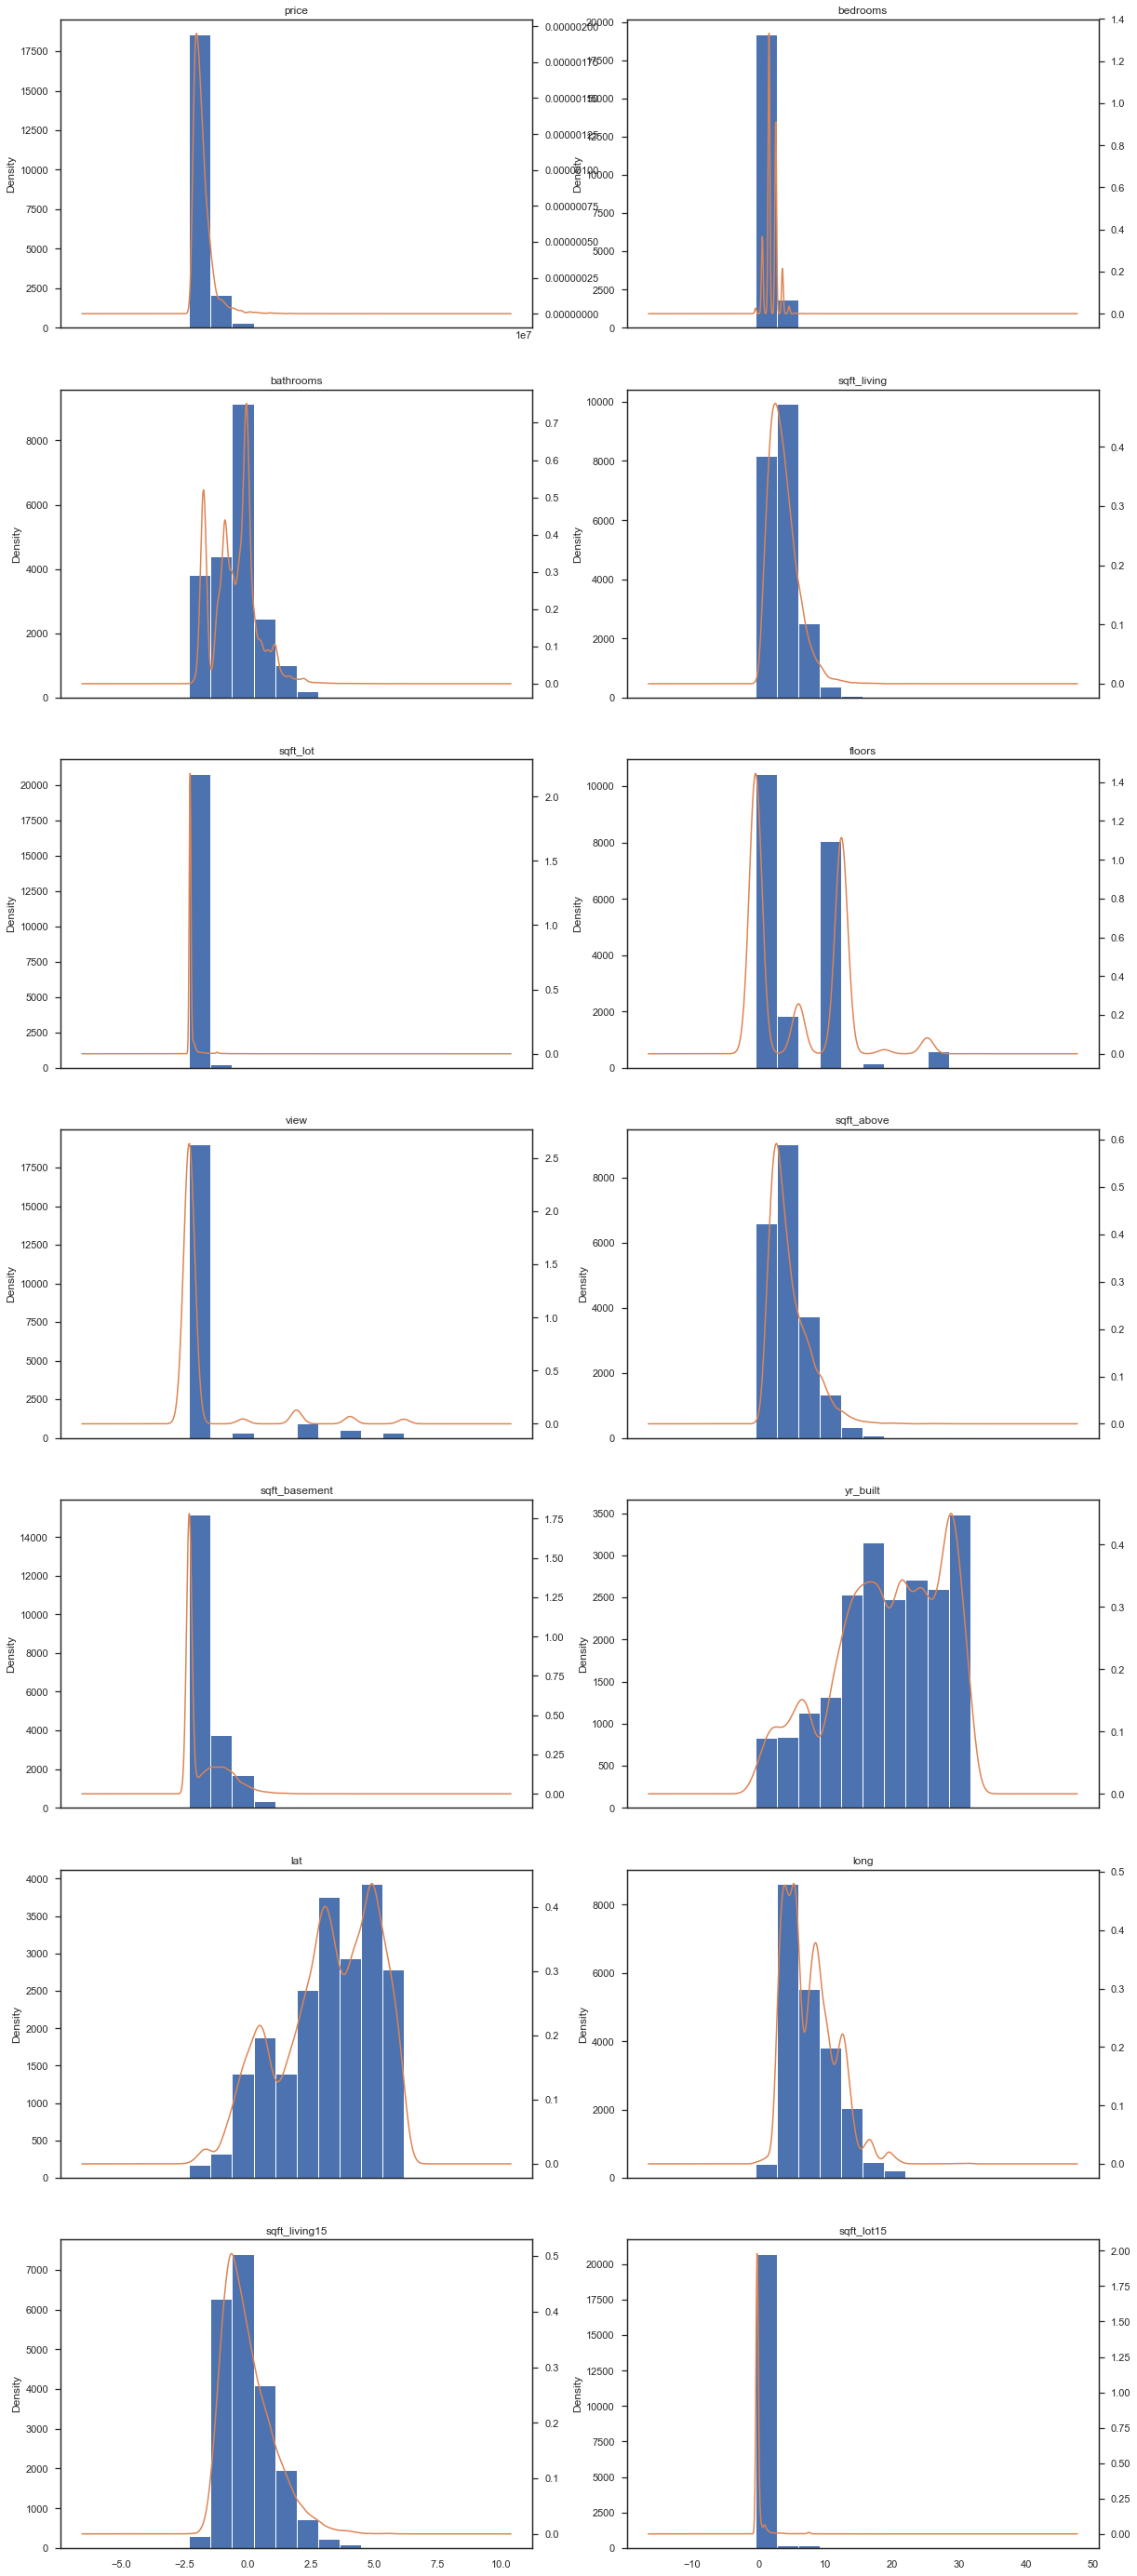

In [504]:
#lets add the KDEs to take a better look...

fig, ax = plt.subplots(7,2, figsize=(20, 50)) 
ax = ax.ravel()

for i in range(14):
    ax[i] = kcdf.iloc[:,i].plot(kind='hist', ax=ax[i])
    ax[i] = kcdf.iloc[:,i].plot(kind='kde', ax=ax[i], secondary_y=True)
    plt.title(kcdf.columns[i])

/Users/noahxdeutsch/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


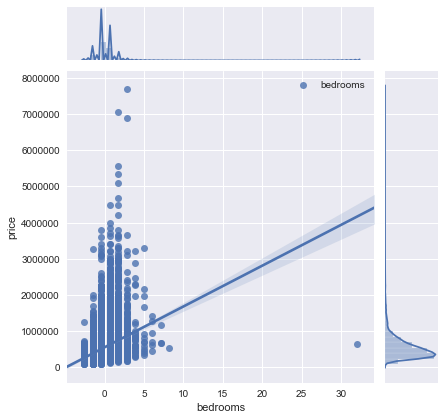

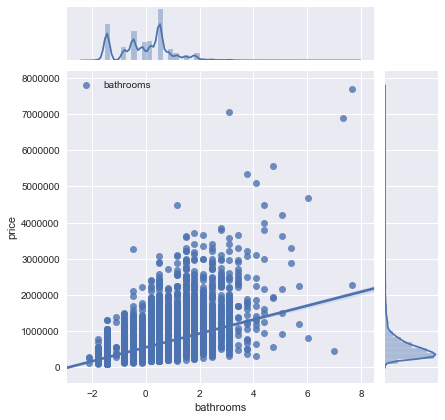

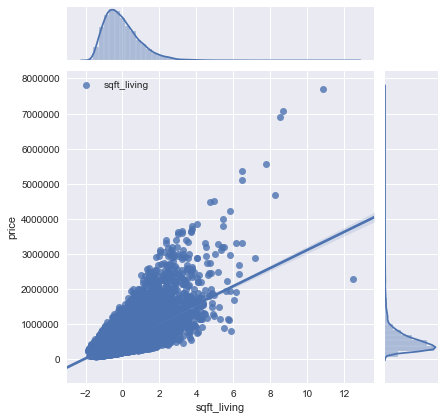

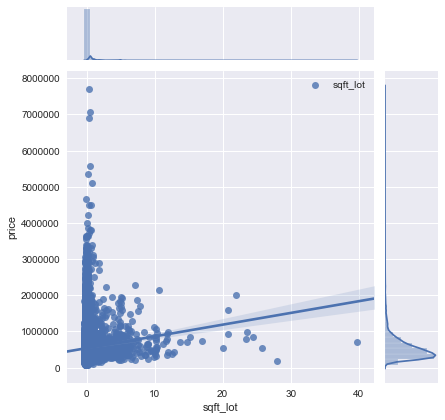

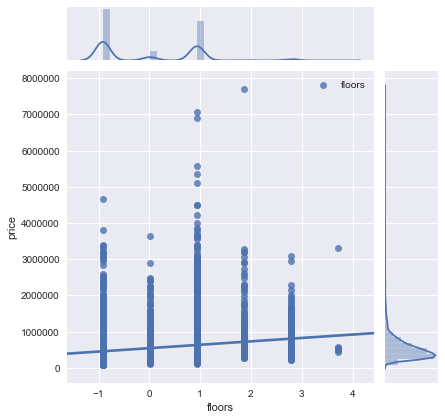

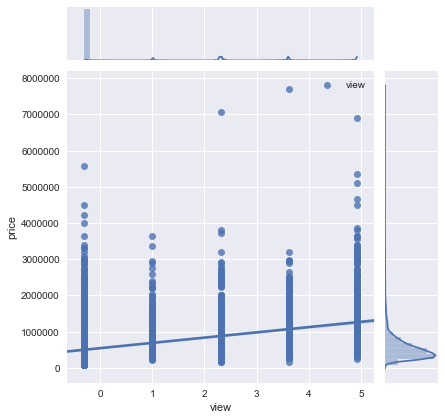

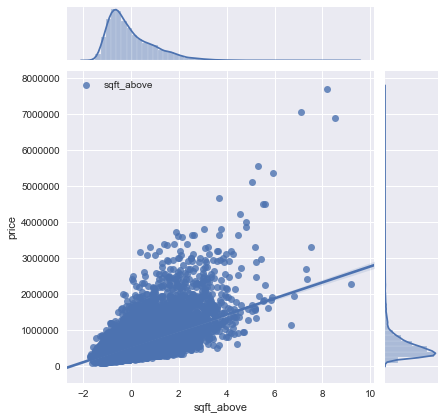

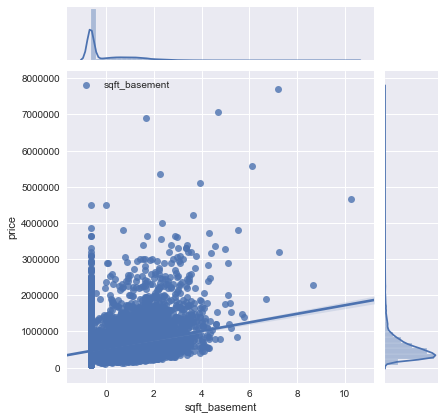

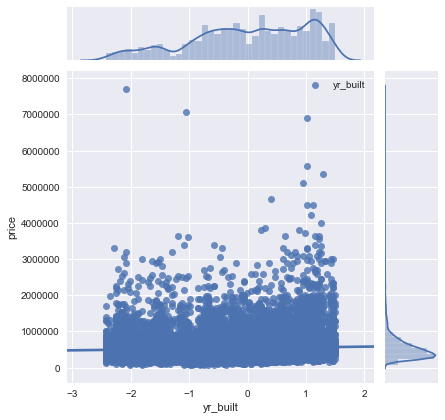

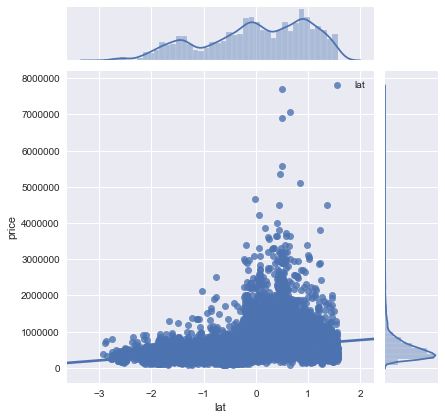

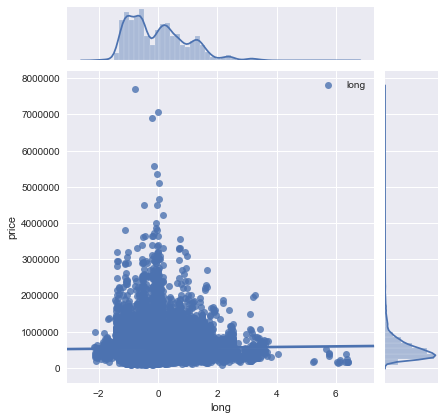

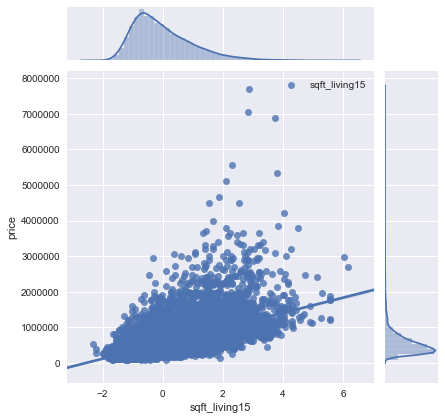

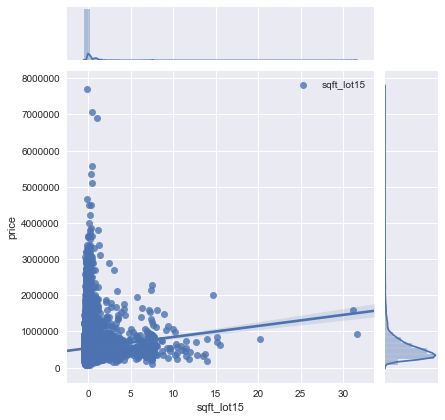

In [505]:
#lastly lets visualize them as joint plots

#Do these predictors have a clear linearity relationship with the target variable, price?
#Are there any outliers we may have to deal with later?


import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

for column in kcdf.iloc[:,1:14].columns:
    sns.jointplot(x=column, y="price", data=kcdf,kind='reg', label=column,)
    #sns.regplot(kcdf[column], kcdf.price, label=column)
    plt.legend()
    plt.show()

In [506]:
#Observations

# Uniformity ----
# Some distributions are relatively uniformly distributed
# Others have multiple common values

# Normality -----
# Many of the variables break the normal assumption, which is problematic.
# Exceptions include Price, most of the sqft predictors, and view (sorta).

# Outliers -----
# There are a lot of outliers for may predictors in the higher price ranges. 
# We can consider cutting these with an upper price threshold when we check the normality of our model later on.
# A number of predictors have outliers at the tail end. We can also consider trimming these later as needed.

# Linear relationship to Price --- 
# Bedrooms, bathrooms, sqft_living, sqft_above, sqft_living15, sqft_lot15 have a clear positive relationship with price.
# Sqft_lot, floors, view, sqft_basement, lat have a weak positive relationship with price
# Yr_built and lat has no clear realtionship with price.

# Step 4. Model
* Fit single regression models for each continuous variable and refine.
* Fit regression models for each group of categorical variables and refine.
* Check Multicollinearity, Normality, and Homoscedasticity and refine.
* Use recursive feature elimination and cross validation to protect against overfitting. 


### Continuous Variables

In [507]:
#Let's begin by looking at single linear regression models for all continuous variables
import statsmodels.formula.api as smf

col_names = kcdf.iloc[:,0:14]
col_names = col_names.drop(['price'],axis=1)
col_names = col_names.columns

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]

for idx, val in enumerate(col_names):
    print ("\nKCDF: price~" + val)
    print ("------------------------------")
    f = 'price~' + val
    model = smf.ols(formula=f, data=kcdf).fit()
    X_new = pd.DataFrame({val: [kcdf[val].min(), kcdf[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], round(model.pvalues[1],5) ])
    print(results[idx+1])

pd.DataFrame(results)


KCDF: price~bedrooms
------------------------------
['bedrooms', 0.09514380839134184, 540246.8904752871, 113120.01945780392, 0.0]

KCDF: price~bathrooms
------------------------------
['bathrooms', 0.27565534211705833, 540246.8904752871, 192545.07397680086, 0.0]

KCDF: price~sqft_living
------------------------------
['sqft_living', 0.49280911924669435, 540246.8904752871, 257447.43745887777, 0.0]

KCDF: price~sqft_lot
------------------------------
['sqft_lot', 0.007814472143692908, 540246.8904752871, 32418.9563158288, 0.0]

KCDF: price~floors
------------------------------
['floors', 0.0658450382176049, 540246.8904752871, 94104.57389679391, 0.0]

KCDF: price~view
------------------------------
['view', 0.15774906044067227, 540246.8904752871, 145657.41431009537, 0.0]

KCDF: price~sqft_above
------------------------------
['sqft_above', 0.36660773487327236, 540246.8904752871, 222049.6113491868, 0.0]

KCDF: price~sqft_basement
------------------------------
['sqft_basement', 0.104340067

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0951438,540247,113120,0
2,bathrooms,0.275655,540247,192545,0
3,sqft_living,0.492809,540247,257447,0
4,sqft_lot,0.00781447,540247,32419,0
5,floors,0.065845,540247,94104.6,0
6,view,0.157749,540247,145657,0
7,sqft_above,0.366608,540247,222050,0
8,sqft_basement,0.10434,540247,118461,0
9,yr_built,0.00300846,540247,20115.1,0


In [508]:
#Let's remove the continuous variables which had a R-squared value <0.01
kcdf = kcdf.drop(['sqft_lot','yr_built','long','sqft_lot15'],axis=1)

### Categorical Variables

In [509]:
#first lets do some organizing

kcdf = kcdf.rename(columns={'waterfront_0.0': 'waterfront_0', 'waterfront_1.0': 'waterfront_1'})
kcdf = kcdf.rename(columns={'binned_yr_renovated_(-1, 1]': 'bin_yr_ren_none', 
                            'binned_yr_renovated_(1933, 1953]': 'bin_yr_ren_1933_1953',
                            'binned_yr_renovated_(1953, 1973]': 'bin_yr_ren_1953_1973',
                            'binned_yr_renovated_(1973, 1993]': 'bin_yr_ren_1973_1993',
                            'binned_yr_renovated_(1993, 2016]': 'bin_yr_ren_1993_2016'})


#for col in kcdf.iloc[:,99:900].columns:
    #kcdf = kcdf.rename(columns={col: col[:-1] + ')'})

target = kcdf['price']
col_cont = kcdf.iloc[:,1:10].columns
col_wf = kcdf.iloc[:,10:13].columns
col_cond = kcdf.iloc[:,13:18].columns
col_grade = kcdf.iloc[:,18:29].columns
col_zip = kcdf.iloc[:,29:99].columns
col_yr_ren = kcdf.iloc[:,99:900].columns

In [510]:
cols = [col_wf , col_cond, col_grade, col_zip, col_yr_ren]

for col in cols:
    sum_cols = "+".join(col)
    form = "price~" + sum_cols
    model = smf.ols(formula= form, data= kcdf).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     512.7
Date:                Mon, 13 Apr 2020   Prob (F-statistic):          1.22e-321
Time:                        12:46:37   Log-Likelihood:            -2.9928e+05
No. Observations:               21082   AIC:                         5.986e+05
Df Residuals:                   21078   BIC:                         5.986e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.305e+15    2.1e+17      0.

In [511]:
#Let's break this down

#For waterfront - our R^2 is low and P Values are High. This is an obvious candidate to cut.
#For Condition - our pvalues are better here, but our R^2 is still too low.. Lets cut this too.
#For Grade – Good R^2 but terrble P values. Lets cut it.
#for Zipcode – Finally! A respectable R^2 and generally low pvalues. This is a keeper!
#YR_Rennovated – another low R^2 iand high P Values. Obvious candidate to cut.

#this leaves us only with Zipcode for our categorical data!

In [512]:
#let's make the neccessary adjusments

final_kcdf = kcdf.drop(col_wf,axis=1)
final_kcdf = final_kcdf.drop(col_cond,axis=1)
final_kcdf = final_kcdf.drop(col_grade,axis=1)
final_kcdf = final_kcdf.drop(col_yr_ren,axis=1)

#dropping one from the remaining cat data
final_kcdf = final_kcdf.drop(['zipcode_98136'],axis=1)

final_kcdf.shape

(21082, 79)

### Refined Model 1

In [513]:
#now let's fit another model with all our selected predictors 

outcome = 'price'
x_cols = final_kcdf.drop(['price'],axis=1).columns

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = smf.ols(formula=formula, data=final_kcdf).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     944.4
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:46:38   Log-Likelihood:            -2.8415e+05
No. Observations:               21082   AIC:                         5.685e+05
Df Residuals:                   21003   BIC:                         5.691e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.159e+05   1.11e+04     55.474      0.000    5.94e+05    6.38e+05
bedrooms      -3.208e+04   1522.897    -21.066      0.000   -3.51e+04   -2.91e+04
bathrooms      1.772e+04   2047.605      8.656      0.000    1.37e+04    2.17e+04
sqft_living   -5.338e+08      8e+07     -6.672      0.000   -6.91e+08   -3.77e+08
floors        -2.795e+04   1719.050    -16.261      0.000   -3.13e+04   -2.46e+04
view           7.132e+04   1348.948     52.874      0.000    6.87e+04     7.4e+04
sqft_above      4.82e+08   7.22e+07      6.675      0.000     3.4e+08    6.24e+08
sqft_basement  2.571e+08   3.85e+07      6.674      0.000    1.82e+08    3.33e+08
lat            2.213e+04   9531.673      2.322      0.020    3446.899    4.08e+04
sqft_living15  1.523e+04   2079.937      7.321      0.000    1.12e+04    1.93e+04
zipcode_98001 -2.451e+05   2.14e+04    -11.460      0.000   -2.87e+05   -2.03e+05
zipcode_98002 -2.146e+05   2.29e+04     -9.371      0.000   -2.59e+05    -1.7e+05
zipcode_98003 -2.506e+05   2.16e+04    -11.596      0.000   -2.93e+05   -2.08e+05
zipcode_98004  5.204e+05   1.58e+04     32.880      0.000    4.89e+05    5.51e+05
zipcode_98005  5.681e+04   1.82e+04      3.120      0.002    2.11e+04    9.25e+04
zipcode_98006  1.355e+04   1.38e+04      0.984      0.325   -1.34e+04    4.05e+04
zipcode_98007 -7005.8189   1.91e+04     -0.367      0.713   -4.44e+04    3.04e+04
zipcode_98008 -5454.3923    1.6e+04     -0.341      0.733   -3.68e+04    2.59e+04
zipcode_98010 -1.754e+05   2.51e+04     -6.991      0.000   -2.25e+05   -1.26e+05
zipcode_98011 -1.886e+05   2.24e+04     -8.429      0.000   -2.32e+05   -1.45e+05
zipcode_98014 -2.074e+05   2.12e+04     -9.781      0.000   -2.49e+05   -1.66e+05
zipcode_98019 -2.343e+05   2.16e+04    -10.833      0.000   -2.77e+05   -1.92e+05
zipcode_98022 -2.422e+05   2.76e+04     -8.781      0.000   -2.96e+05   -1.88e+05
zipcode_98023 -2.619e+05   2.09e+04    -12.538      0.000   -3.03e+05   -2.21e+05
zipcode_98024 -1.308e+05   2.26e+04     -5.793      0.000   -1.75e+05   -8.66e+04
zipcode_98027 -9.022e+04   1.42e+04     -6.366      0.000   -1.18e+05   -6.24e+04
zipcode_98028  -1.86e+05   2.12e+04     -8.754      0.000   -2.28e+05   -1.44e+05
zipcode_98029 -4.853e+04   1.49e+04     -3.249      0.001   -7.78e+04   -1.93e+04
zipcode_98030 -2.466e+05   1.95e+04    -12.663      0.000   -2.85e+05   -2.08e+05
zipcode_98031 -2.339e+05   1.79e+04    -13.032      0.000   -2.69e+05   -1.99e+05
zipcode_98032 -2.296e+05   2.23e+04    -10.300      0.000   -2.73e+05   -1.86e+05
zipcode_98033  8.288e+04   1.69e+04      4.892      0.000    4.97e+04    1.16e+05
zipcode_98034 -9.192e+04   1.83e+04     -5.035      0.000   -1.28e+05   -5.61e+04
zipcode_98038 -2.296e+05   1.76e+04    -13.035      0.000   -2.64e+05   -1.95e+05
zipcode_98039  1.052e+06    2.8e+04     37.619   

In [514]:
#Our R^2 is good, and most of our pvalues are pretty good.

#We can remove zipcode_98006, zipcode_98007, zipcode_98008 for abnormally high p values
final_kcdf = final_kcdf.drop(['zipcode_98006'],axis=1)
final_kcdf = final_kcdf.drop(['zipcode_98007'],axis=1)
final_kcdf = final_kcdf.drop(['zipcode_98008'],axis=1)

#now let's try again
outcome = 'price'
x_cols = final_kcdf.drop(['price'],axis=1).columns

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = smf.ols(formula=formula, data=final_kcdf).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     982.1
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:46:39   Log-Likelihood:            -2.8415e+05
No. Observations:               21082   AIC:                         5.685e+05
Df Residuals:                   21006   BIC:                         5.691e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.197e+05   5219.060    118.739      0.000    6.09e+05     6.3e+05
bedrooms      -3.215e+04   1519.255    -21.165      0.000   -3.51e+04   -2.92e+04
bathrooms      1.774e+04   2047.244      8.664      0.000    1.37e+04    2.17e+04
sqft_living   -5.347e+08      8e+07     -6.683      0.000   -6.92e+08   -3.78e+08
floors        -2.797e+04   1714.308    -16.318      0.000   -3.13e+04   -2.46e+04
view           7.126e+04   1345.740     52.955      0.000    6.86e+04    7.39e+04
sqft_above     4.828e+08   7.22e+07      6.686      0.000    3.41e+08    6.24e+08
sqft_basement  2.576e+08   3.85e+07      6.685      0.000    1.82e+08    3.33e+08
lat            1.838e+04   8832.958      2.081      0.037    1071.590    3.57e+04
sqft_living15  1.564e+04   2059.532      7.594      0.000    1.16e+04    1.97e+04
zipcode_98001 -2.555e+05   1.99e+04    -12.824      0.000   -2.95e+05   -2.16e+05
zipcode_98002 -2.248e+05   2.16e+04    -10.414      0.000   -2.67e+05   -1.82e+05
zipcode_98003 -2.609e+05   2.02e+04    -12.940      0.000      -3e+05   -2.21e+05
zipcode_98004  5.178e+05   1.14e+04     45.422      0.000    4.95e+05     5.4e+05
zipcode_98005  5.407e+04   1.46e+04      3.710      0.000    2.55e+04    8.26e+04
zipcode_98010 -1.853e+05   2.38e+04     -7.773      0.000   -2.32e+05   -1.39e+05
zipcode_98011 -1.872e+05   1.78e+04    -10.517      0.000   -2.22e+05   -1.52e+05
zipcode_98014 -2.082e+05   1.77e+04    -11.783      0.000   -2.43e+05   -1.74e+05
zipcode_98019 -2.333e+05   1.72e+04    -13.568      0.000   -2.67e+05      -2e+05
zipcode_98022 -2.553e+05   2.63e+04     -9.701      0.000   -3.07e+05   -2.04e+05
zipcode_98023 -2.724e+05   1.94e+04    -14.072      0.000    -3.1e+05   -2.34e+05
zipcode_98024 -1.347e+05   2.03e+04     -6.632      0.000   -1.75e+05   -9.49e+04
zipcode_98027 -9.527e+04   1.06e+04     -8.945      0.000   -1.16e+05   -7.44e+04
zipcode_98028 -1.845e+05   1.64e+04    -11.254      0.000   -2.17e+05   -1.52e+05
zipcode_98029 -5.242e+04   1.12e+04     -4.659      0.000   -7.45e+04   -3.04e+04
zipcode_98030 -2.554e+05   1.78e+04    -14.339      0.000    -2.9e+05   -2.21e+05
zipcode_98031 -2.418e+05   1.61e+04    -15.066      0.000   -2.73e+05    -2.1e+05
zipcode_98032 -2.382e+05   2.09e+04    -11.406      0.000   -2.79e+05   -1.97e+05
zipcode_98033  8.224e+04   1.19e+04      6.882      0.000    5.88e+04    1.06e+05
zipcode_98034  -9.13e+04    1.3e+04     -7.001      0.000   -1.17e+05   -6.57e+04
zipcode_98038 -2.386e+05   1.57e+04    -15.161      0.000   -2.69e+05   -2.08e+05
zipcode_98039   1.05e+06   2.56e+04     41.018      0.000       1e+06     1.1e+06
zipcode_98040  2.736e+05   1.17e+04     23.321      0.000    2.51e+05    2.97e+05
zipcode_98042 -2.512e+05   1.61e+04    -15.616      0.000   -2.83e+05    -2.2e+05
zipcode_98045 -1.883e+05   1.44e+04    -13.060   

In [515]:
#Great our pvalues are looking pretty good. Let's run some more diagnostics.

### Rechecking Multicolinearity

In [516]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_cols = final_kcdf.drop(['price'],axis=1)

X = x_cols
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

#VF of 5-10 or greater indicates multicolinearity

[('bedrooms', 1.6233586906547068),
 ('bathrooms', 2.9499963243642275),
 ('sqft_living', 4505568560.831579),
 ('floors', 2.0653187390149053),
 ('view', 1.2713903686002572),
 ('sqft_above', 3669868004.5034),
 ('sqft_basement', 1044867675.8062038),
 ('lat', 53.512640646968435),
 ('sqft_living15', 2.9644048603798616),
 ('zipcode_98001', 3.935117651425598),
 ('zipcode_98002', 2.6668332680766897),
 ('zipcode_98003', 3.1631143047992385),
 ('zipcode_98004', 1.1532858767136227),
 ('zipcode_98005', 1.0702216611704582),
 ('zipcode_98010', 1.6716067697465649),
 ('zipcode_98011', 1.9567080541358954),
 ('zipcode_98014', 1.2013292436517247),
 ('zipcode_98019', 1.7806378095659265),
 ('zipcode_98022', 4.662738263211242),
 ('zipcode_98023', 5.079624703129823),
 ('zipcode_98024', 1.003261971751024),
 ('zipcode_98027', 1.0923009405559234),
 ('zipcode_98028', 2.375109236316568),
 ('zipcode_98029', 1.0179282422787719),
 ('zipcode_98030', 2.2147913541905035),
 ('zipcode_98031', 1.865281927132655),
 ('zipcode

In [517]:
#Whoa... Our SQFTs are a problem here, which makes sense. 
#Let's just stick with SQFT_living and see what that does
#we can also drop Lat

final_kcdf = final_kcdf.drop(['sqft_above'],axis=1)
final_kcdf = final_kcdf.drop(['sqft_basement'],axis=1)
final_kcdf = final_kcdf.drop(['lat'],axis=1)


In [518]:
#let's check again

x_cols = final_kcdf.drop(['price'],axis=1)

X = x_cols
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.618409860905413),
 ('bathrooms', 2.8819916337884823),
 ('sqft_living', 4.276924497154707),
 ('floors', 1.5060021254881861),
 ('view', 1.2434234383192984),
 ('sqft_living15', 2.870350311998174),
 ('zipcode_98001', 1.0017941905063774),
 ('zipcode_98002', 1.007997006075621),
 ('zipcode_98003', 1.0023045071362722),
 ('zipcode_98004', 1.028321045142086),
 ('zipcode_98005', 1.01553054828568),
 ('zipcode_98010', 1.0006140210203702),
 ('zipcode_98011', 1.0039597960142208),
 ('zipcode_98014', 1.0020625068581264),
 ('zipcode_98019', 1.0032822554838672),
 ('zipcode_98022', 1.0068455794493207),
 ('zipcode_98023', 1.0041256958298679),
 ('zipcode_98024', 1.0011693991342243),
 ('zipcode_98027', 1.0127377120487104),
 ('zipcode_98028', 1.0015625641831634),
 ('zipcode_98029', 1.0174352992746327),
 ('zipcode_98030', 1.002099876995516),
 ('zipcode_98031', 1.0028887925400756),
 ('zipcode_98032', 1.003757760133997),
 ('zipcode_98033', 1.0039974945179226),
 ('zipcode_98034', 1.005631868523326

In [519]:
#Okay! We're good to go now.
#Let's see how this effects the R^2 of our model.
outcome = 'price'
x_cols = final_kcdf.drop(['price'],axis=1).columns

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = smf.ols(formula=formula, data=final_kcdf).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     979.7
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:47:05   Log-Likelihood:            -2.8451e+05
No. Observations:               21082   AIC:                         5.692e+05
Df Residuals:                   21009   BIC:                         5.697e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.172e+05   5235.920    117.885      0.000    6.07e+05    6.28e+05
bedrooms      -3.358e+04   1542.720    -21.764      0.000   -3.66e+04   -3.06e+04
bathrooms      9979.6996   2057.659      4.850      0.000    5946.530     1.4e+04
sqft_living    2.079e+05   2506.724     82.919      0.000    2.03e+05    2.13e+05
floors        -5292.3459   1491.650     -3.548      0.000   -8216.094   -2368.598
view           6.606e+04   1353.335     48.811      0.000    6.34e+04    6.87e+04
sqft_living15  2.549e+04   2060.613     12.372      0.000    2.15e+04    2.95e+04
zipcode_98001 -2.781e+05   1.08e+04    -25.801      0.000   -2.99e+05   -2.57e+05
zipcode_98002 -2.421e+05   1.36e+04    -17.738      0.000   -2.69e+05   -2.15e+05
zipcode_98003 -2.846e+05   1.19e+04    -23.963      0.000   -3.08e+05   -2.61e+05
zipcode_98004  5.327e+05   1.13e+04     47.312      0.000    5.11e+05    5.55e+05
zipcode_98005   6.54e+04   1.46e+04      4.473      0.000    3.67e+04    9.41e+04
zipcode_98010 -1.972e+05   1.85e+04    -10.637      0.000   -2.34e+05   -1.61e+05
zipcode_98011 -1.577e+05   1.38e+04    -11.455      0.000   -1.85e+05   -1.31e+05
zipcode_98014 -1.751e+05   1.68e+04    -10.421      0.000   -2.08e+05   -1.42e+05
zipcode_98019 -1.998e+05   1.39e+04    -14.379      0.000   -2.27e+05   -1.73e+05
zipcode_98022 -2.787e+05   1.28e+04    -21.726      0.000   -3.04e+05   -2.54e+05
zipcode_98023 -2.993e+05   9562.033    -31.300      0.000   -3.18e+05   -2.81e+05
zipcode_98024 -1.093e+05   2.06e+04     -5.303      0.000    -1.5e+05   -6.89e+04
zipcode_98027 -1.042e+05   1.03e+04    -10.120      0.000   -1.24e+05    -8.4e+04
zipcode_98028 -1.578e+05   1.18e+04    -13.347      0.000   -1.81e+05   -1.35e+05
zipcode_98029 -4.443e+04   1.14e+04     -3.898      0.000   -6.68e+04   -2.21e+04
zipcode_98030 -2.697e+05   1.23e+04    -21.885      0.000   -2.94e+05   -2.46e+05
zipcode_98031 -2.555e+05    1.2e+04    -21.227      0.000   -2.79e+05   -2.32e+05
zipcode_98032 -2.618e+05   1.68e+04    -15.578      0.000   -2.95e+05   -2.29e+05
zipcode_98033  1.069e+05   9995.061     10.696      0.000    8.73e+04    1.26e+05
zipcode_98034 -6.484e+04   9234.187     -7.022      0.000   -8.29e+04   -4.67e+04
zipcode_98038 -2.501e+05   9096.141    -27.490      0.000   -2.68e+05   -2.32e+05
zipcode_98039  1.086e+06   2.58e+04     42.134      0.000    1.04e+06    1.14e+06
zipcode_98040  2.725e+05   1.19e+04     22.903      0.000    2.49e+05    2.96e+05
zipcode_98042 -2.629e+05   9228.295    -28.493      0.000   -2.81e+05   -2.45e+05
zipcode_98045 -1.808e+05   1.31e+04    -13.795      0.000   -2.07e+05   -1.55e+05
zipcode_98052  -2.83e+04   9103.287     -3.109      0.002   -4.61e+04   -1.05e+04
zipcode_98053 -7.471e+04   1.04e+04     -7.216      0.000    -9.5e+04   -5.44e+04
zipcode_98055 -2.333e+05   1.21e+04    -19.259   

In [520]:
#great, no big change, 

#but I did spot a predictor with a PValue we need to take out
final_kcdf = final_kcdf.drop(['zipcode_98144'],axis=1)

#let's run again...
outcome = 'price'
x_cols = final_kcdf.drop(['price'],axis=1).columns

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = smf.ols(formula=formula, data=final_kcdf).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     993.6
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:47:11   Log-Likelihood:            -2.8451e+05
No. Observations:               21082   AIC:                         5.692e+05
Df Residuals:                   21010   BIC:                         5.697e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.177e+05   4589.038    134.604      0.000    6.09e+05    6.27e+05
bedrooms      -3.358e+04   1542.414    -21.771      0.000   -3.66e+04   -3.06e+04
bathrooms      9975.3624   2057.477      4.848      0.000    5942.550     1.4e+04
sqft_living    2.079e+05   2506.622     82.923      0.000    2.03e+05    2.13e+05
floors        -5269.2134   1486.308     -3.545      0.000   -8182.491   -2355.936
view           6.606e+04   1352.888     48.831      0.000    6.34e+04    6.87e+04
sqft_living15  2.546e+04   2052.383     12.405      0.000    2.14e+04    2.95e+04
zipcode_98001 -2.786e+05   1.05e+04    -26.595      0.000   -2.99e+05   -2.58e+05
zipcode_98002 -2.425e+05   1.34e+04    -18.109      0.000   -2.69e+05   -2.16e+05
zipcode_98003  -2.85e+05   1.16e+04    -24.557      0.000   -3.08e+05   -2.62e+05
zipcode_98004  5.322e+05    1.1e+04     48.303      0.000    5.11e+05    5.54e+05
zipcode_98005  6.498e+04   1.44e+04      4.500      0.000    3.67e+04    9.33e+04
zipcode_98010 -1.977e+05   1.84e+04    -10.762      0.000   -2.34e+05   -1.62e+05
zipcode_98011 -1.582e+05   1.36e+04    -11.672      0.000   -1.85e+05   -1.32e+05
zipcode_98014 -1.755e+05   1.66e+04    -10.572      0.000   -2.08e+05   -1.43e+05
zipcode_98019 -2.003e+05   1.37e+04    -14.658      0.000   -2.27e+05   -1.73e+05
zipcode_98022 -2.792e+05   1.26e+04    -22.209      0.000   -3.04e+05   -2.55e+05
zipcode_98023 -2.997e+05   9234.410    -32.460      0.000   -3.18e+05   -2.82e+05
zipcode_98024 -1.097e+05   2.05e+04     -5.363      0.000    -1.5e+05   -6.96e+04
zipcode_98027 -1.047e+05      1e+04    -10.463      0.000   -1.24e+05   -8.51e+04
zipcode_98028 -1.583e+05   1.16e+04    -13.688      0.000   -1.81e+05   -1.36e+05
zipcode_98029  -4.49e+04   1.11e+04     -4.041      0.000   -6.67e+04   -2.31e+04
zipcode_98030 -2.701e+05   1.21e+04    -22.398      0.000   -2.94e+05   -2.47e+05
zipcode_98031 -2.559e+05   1.18e+04    -21.747      0.000   -2.79e+05   -2.33e+05
zipcode_98032 -2.623e+05   1.66e+04    -15.787      0.000   -2.95e+05    -2.3e+05
zipcode_98033  1.065e+05   9688.117     10.988      0.000    8.75e+04    1.25e+05
zipcode_98034  -6.53e+04   8891.214     -7.344      0.000   -8.27e+04   -4.79e+04
zipcode_98038 -2.505e+05   8737.959    -28.670      0.000   -2.68e+05   -2.33e+05
zipcode_98039  1.086e+06   2.57e+04     42.275      0.000    1.04e+06    1.14e+06
zipcode_98040  2.721e+05   1.17e+04     23.301      0.000    2.49e+05    2.95e+05
zipcode_98042 -2.634e+05   8877.945    -29.669      0.000   -2.81e+05   -2.46e+05
zipcode_98045 -1.813e+05   1.29e+04    -14.100      0.000   -2.06e+05   -1.56e+05
zipcode_98052 -2.875e+04   8772.615     -3.277      0.001   -4.59e+04   -1.16e+04
zipcode_98053 -7.515e+04   1.01e+04     -7.468      0.000   -9.49e+04   -5.54e+04
zipcode_98055 -2.337e+05   1.18e+04    -19.739   

In [ ]:
#Now on to more tests!

### Checking for Normality & Homoscedasticity

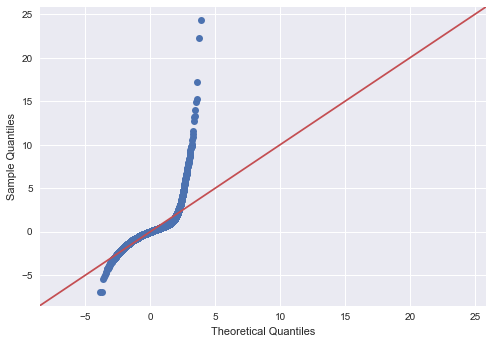

In [521]:
#Let's check for Normality

import statsmodels.api as sm
import scipy.stats as stats

fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [427]:
#That's not what we want to see, but makes sense given how many variables broke the normality assumption.
#Looks like we're gonna have to do some serious processing...

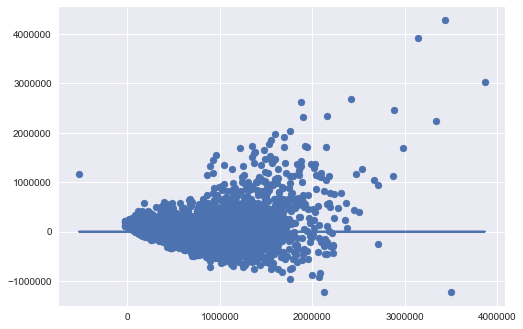

In [522]:
#Let's check Homoscedasticity too.

plt.scatter(model.predict(final_kcdf[x_cols]), model.resid)
plt.plot(model.predict(final_kcdf[x_cols]), [0 for i in range(len(final_kcdf))])

In [523]:
#Yep, we're seeing a lot of problems towards the tail end.

In [524]:
#Let's see what happens if we remove all the data for homes above 1.25Mil in price. (arrived at by trial and error)
#This will lessen the scope of our model but may make it more accurate.

kcdf_3 = final_kcdf[final_kcdf['price']<1250000]
print ('before: ',len(final_kcdf))
print ('after:',len (kcdf_3))
print('----')
print('%data remaining: ',round(len(kcdf_3)/len(final_kcdf),2))


before:  21082
after: 20201
----
%data remaining:  0.96


In [525]:
#good, we're only losing about 4% of our data

outcome = 'price'
x_cols = kcdf_3.drop(['price'],axis=1).columns

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = smf.ols(formula=formula, data=kcdf_3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1158.
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:47:39   Log-Likelihood:            -2.6083e+05
No. Observations:               20201   AIC:                         5.218e+05
Df Residuals:                   20129   BIC:                         5.224e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.914e+05   2643.292    223.729      0.000    5.86e+05    5.97e+05
bedrooms      -8830.8739    899.153     -9.821      0.000   -1.06e+04   -7068.460
bathrooms      5689.5007   1194.721      4.762      0.000    3347.750    8031.251
sqft_living    1.211e+05   1585.560     76.400      0.000    1.18e+05    1.24e+05
floors          444.2192    851.549      0.522      0.602   -1224.886    2113.324
view           2.975e+04    864.370     34.422      0.000    2.81e+04    3.14e+04
sqft_living15  4.181e+04   1254.117     33.340      0.000    3.94e+04    4.43e+04
zipcode_98001 -2.717e+05   5875.833    -46.243      0.000   -2.83e+05    -2.6e+05
zipcode_98002 -2.561e+05   7496.629    -34.164      0.000   -2.71e+05   -2.41e+05
zipcode_98003 -2.685e+05   6505.691    -41.279      0.000   -2.81e+05   -2.56e+05
zipcode_98004   2.69e+05   8032.662     33.485      0.000    2.53e+05    2.85e+05
zipcode_98005  8.515e+04   8312.182     10.245      0.000    6.89e+04    1.01e+05
zipcode_98010 -1.716e+05   1.03e+04    -16.713      0.000   -1.92e+05   -1.51e+05
zipcode_98011 -1.333e+05   7592.913    -17.562      0.000   -1.48e+05   -1.18e+05
zipcode_98014 -1.499e+05   9392.997    -15.954      0.000   -1.68e+05   -1.31e+05
zipcode_98019 -1.791e+05   7651.453    -23.408      0.000   -1.94e+05   -1.64e+05
zipcode_98022 -2.462e+05   7047.188    -34.935      0.000    -2.6e+05   -2.32e+05
zipcode_98023 -2.883e+05   5195.465    -55.488      0.000   -2.98e+05   -2.78e+05
zipcode_98024 -1.028e+05   1.19e+04     -8.656      0.000   -1.26e+05   -7.95e+04
zipcode_98027 -7.654e+04   5706.925    -13.412      0.000   -8.77e+04   -6.54e+04
zipcode_98028 -1.394e+05   6495.341    -21.469      0.000   -1.52e+05   -1.27e+05
zipcode_98029 -2.761e+04   6286.966     -4.392      0.000   -3.99e+04   -1.53e+04
zipcode_98030 -2.672e+05   6757.732    -39.539      0.000    -2.8e+05   -2.54e+05
zipcode_98031 -2.556e+05   6595.698    -38.758      0.000   -2.69e+05   -2.43e+05
zipcode_98032 -2.669e+05   9288.816    -28.734      0.000   -2.85e+05   -2.49e+05
zipcode_98033  7.027e+04   5706.877     12.312      0.000    5.91e+04    8.15e+04
zipcode_98034 -8.084e+04   5064.153    -15.964      0.000   -9.08e+04   -7.09e+04
zipcode_98038 -2.349e+05   4923.136    -47.718      0.000   -2.45e+05   -2.25e+05
zipcode_98039  4.142e+05   3.28e+04     12.613      0.000     3.5e+05    4.79e+05
zipcode_98040  1.873e+05   7850.967     23.860      0.000    1.72e+05    2.03e+05
zipcode_98042 -2.562e+05   4993.665    -51.310      0.000   -2.66e+05   -2.46e+05
zipcode_98045 -1.513e+05   7232.535    -20.912      0.000   -1.65e+05   -1.37e+05
zipcode_98052 -4582.7041   4967.744     -0.922      0.356   -1.43e+04    5154.481
zipcode_98053 -2.622e+04   5732.768     -4.574      0.000   -3.75e+04    -1.5e+04
zipcode_98055 -2.321e+05   6634.427    -34.982   

In [526]:
#Our R^2 has gone up, and hopefully this has improved our normality and homoscedasticity

#we'll check that in a minute... 

#first though, we have to get rid of more predictors based on pvalues..
kcdf_3 = kcdf_3.drop(['zipcode_98052'],axis=1)
kcdf_3 = kcdf_3.drop(['floors'],axis=1)


#and run the model again
outcome = 'price'
x_cols = kcdf_3.drop(['price'],axis=1).columns

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = smf.ols(formula=formula, data=kcdf_3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1191.
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:51:01   Log-Likelihood:            -2.6083e+05
No. Observations:               20201   AIC:                         5.218e+05
Df Residuals:                   20131   BIC:                         5.223e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        5.9e+05   2236.543    263.819      0.000    5.86e+05    5.94e+05
bedrooms      -8865.2530    895.218     -9.903      0.000   -1.06e+04   -7110.552
bathrooms      5901.0735   1104.942      5.341      0.000    3735.297    8066.849
sqft_living    1.212e+05   1585.331     76.425      0.000    1.18e+05    1.24e+05
view           2.979e+04    858.162     34.719      0.000    2.81e+04    3.15e+04
sqft_living15  4.176e+04   1249.965     33.408      0.000    3.93e+04    4.42e+04
zipcode_98001 -2.704e+05   5706.405    -47.385      0.000   -2.82e+05   -2.59e+05
zipcode_98002 -2.548e+05   7371.776    -34.571      0.000   -2.69e+05    -2.4e+05
zipcode_98003 -2.673e+05   6353.047    -42.082      0.000    -2.8e+05   -2.55e+05
zipcode_98004  2.702e+05   7895.494     34.224      0.000    2.55e+05    2.86e+05
zipcode_98005  8.628e+04   8165.848     10.565      0.000    7.03e+04    1.02e+05
zipcode_98010 -1.703e+05   1.02e+04    -16.743      0.000    -1.9e+05    -1.5e+05
zipcode_98011  -1.32e+05   7451.091    -17.718      0.000   -1.47e+05   -1.17e+05
zipcode_98014 -1.485e+05   9287.248    -15.991      0.000   -1.67e+05    -1.3e+05
zipcode_98019 -1.776e+05   7506.234    -23.662      0.000   -1.92e+05   -1.63e+05
zipcode_98022  -2.45e+05   6918.660    -35.409      0.000   -2.59e+05   -2.31e+05
zipcode_98023 -2.871e+05   4997.117    -57.447      0.000   -2.97e+05   -2.77e+05
zipcode_98024 -1.015e+05   1.18e+04     -8.612      0.000   -1.25e+05   -7.84e+04
zipcode_98027 -7.512e+04   5512.489    -13.627      0.000   -8.59e+04   -6.43e+04
zipcode_98028 -1.382e+05   6336.109    -21.804      0.000   -1.51e+05   -1.26e+05
zipcode_98029   -2.6e+04   6091.597     -4.268      0.000   -3.79e+04   -1.41e+04
zipcode_98030 -2.658e+05   6605.908    -40.243      0.000   -2.79e+05   -2.53e+05
zipcode_98031 -2.543e+05   6440.622    -39.488      0.000   -2.67e+05   -2.42e+05
zipcode_98032 -2.657e+05   9186.372    -28.923      0.000   -2.84e+05   -2.48e+05
zipcode_98033  7.156e+04   5525.101     12.951      0.000    6.07e+04    8.24e+04
zipcode_98034 -7.965e+04   4862.223    -16.381      0.000   -8.92e+04   -7.01e+04
zipcode_98038 -2.334e+05   4694.157    -49.727      0.000   -2.43e+05   -2.24e+05
zipcode_98039  4.155e+05   3.28e+04     12.665      0.000    3.51e+05     4.8e+05
zipcode_98040  1.886e+05   7705.955     24.470      0.000    1.73e+05    2.04e+05
zipcode_98042 -2.549e+05   4785.512    -53.260      0.000   -2.64e+05   -2.45e+05
zipcode_98045 -1.499e+05   7096.283    -21.126      0.000   -1.64e+05   -1.36e+05
zipcode_98053 -2.481e+04   5535.192     -4.482      0.000   -3.57e+04    -1.4e+04
zipcode_98055 -2.308e+05   6486.168    -35.583      0.000   -2.44e+05   -2.18e+05
zipcode_98056 -1.634e+05   5427.233    -30.107      0.000   -1.74e+05   -1.53e+05
zipcode_98058 -2.228e+05   5191.266    -42.927   

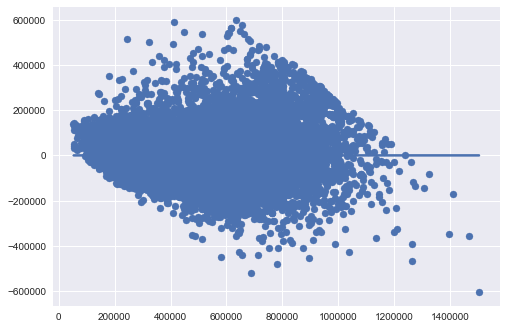

In [527]:
#Our R^2 has gone done, but hopefully this has improved our normality and homoscedasticity
plt.scatter(model.predict(kcdf_3[x_cols]), model.resid)
plt.plot(model.predict(kcdf_3[x_cols]), [0 for i in range(len(kcdf_3))])

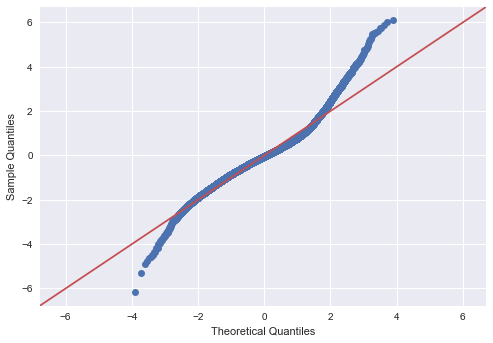

In [528]:
#Huge improvement. Now for normality...
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [434]:
#Normality & Homoscedasticity aren't *perfect* now – 
#but they're greatly improved and good enough to proceed for now.

### Recursive Feature Elemination

In [529]:
#Our model is getting there, but we still have a ton of predictors. 
#Let's explore using recursive feature elimination to get it down to ~30 elements.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

pred = kcdf_3.drop(['price'],axis=1)

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 30)
selector = selector.fit(pred, kcdf_3["price"])

In [530]:
#lets see our results

for i in range(len(pred.columns)):
    if selector.support_[i] == True:
        print ("'" + pred.columns[i] + "'," )

'sqft_living',
'zipcode_98001',
'zipcode_98002',
'zipcode_98003',
'zipcode_98004',
'zipcode_98010',
'zipcode_98019',
'zipcode_98022',
'zipcode_98023',
'zipcode_98030',
'zipcode_98031',
'zipcode_98032',
'zipcode_98038',
'zipcode_98039',
'zipcode_98040',
'zipcode_98042',
'zipcode_98055',
'zipcode_98058',
'zipcode_98092',
'zipcode_98102',
'zipcode_98105',
'zipcode_98108',
'zipcode_98109',
'zipcode_98112',
'zipcode_98119',
'zipcode_98148',
'zipcode_98168',
'zipcode_98178',
'zipcode_98188',
'zipcode_98198',


In [531]:
kcdf4 = kcdf_3[['price',
                'sqft_living',
'zipcode_98001',
'zipcode_98002',
'zipcode_98003',
'zipcode_98004',
'zipcode_98010',
'zipcode_98019',
'zipcode_98022',
'zipcode_98023',
'zipcode_98030',
'zipcode_98031',
'zipcode_98032',
'zipcode_98038',
'zipcode_98039',
'zipcode_98040',
'zipcode_98042',
'zipcode_98055',
'zipcode_98058',
'zipcode_98092',
'zipcode_98102',
'zipcode_98105',
'zipcode_98108',
'zipcode_98109',
'zipcode_98112',
'zipcode_98119',
'zipcode_98148',
'zipcode_98168',
'zipcode_98178',
'zipcode_98188',
'zipcode_98198']]

In [532]:
#lets try the fit again and see the impact on R^2

outcome = 'price'
x_cols = kcdf_4.drop(['price'],axis=1).columns

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = smf.ols(formula=formula, data=kcdf_4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1555.
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:51:59   Log-Likelihood:            -2.5829e+05
No. Observations:               19628   AIC:                         5.166e+05
Df Residuals:                   19609   BIC:                         5.168e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       4.56e+05   1023.706    445.477      0.000    4.54e+05    4.58e+05
sqft_living    1.565e+05   1106.526    141.415      0.000    1.54e+05    1.59e+05
zipcode_98004  3.695e+05    1.1e+04     33.649      0.000    3.48e+05    3.91e+05
zipcode_98023 -1.569e+05   5805.623    -27.030      0.000   -1.68e+05   -1.46e+05
zipcode_98033   1.83e+05   6907.927     26.490      0.000    1.69e+05    1.97e+05
zipcode_98039  5.454e+05   5.62e+04      9.706      0.000    4.35e+05    6.56e+05
zipcode_98040  3.066e+05   1.06e+04     28.822      0.000    2.86e+05    3.27e+05
zipcode_98092 -1.411e+05   6892.156    -20.473      0.000   -1.55e+05   -1.28e+05
zipcode_98102  2.727e+05   1.43e+04     19.118      0.000    2.45e+05    3.01e+05
zipcode_98103  1.861e+05   5422.920     34.326      0.000    1.76e+05    1.97e+05
zipcode_98105  2.395e+05   9777.772     24.493      0.000     2.2e+05    2.59e+05
zipcode_98107  1.911e+05   7920.830     24.129      0.000    1.76e+05    2.07e+05
zipcode_98109  2.884e+05   1.42e+04     20.349      0.000    2.61e+05    3.16e+05
zipcode_98112  2.794e+05   1.05e+04     26.557      0.000    2.59e+05       3e+05
zipcode_98115  1.772e+05   5553.383     31.913      0.000    1.66e+05    1.88e+05
zipcode_98117  1.747e+05   5603.164     31.187      0.000    1.64e+05    1.86e+05
zipcode_98119  2.866e+05   1.07e+04     26.668      0.000    2.66e+05    3.08e+05
zipcode_98122  1.843e+05   7866.420     23.433      0.000    1.69e+05       2e+05
zipcode_98199  2.222e+05   8043.383     27.631      0.000    2.06e+05    2.38e+05
==============================================================================
Omnibus:                      395.248   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.514
Skew:                           0.327   Prob(JB):                     1.20e-94
Kurtosis:                       3.318   Cond. No.                         64.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

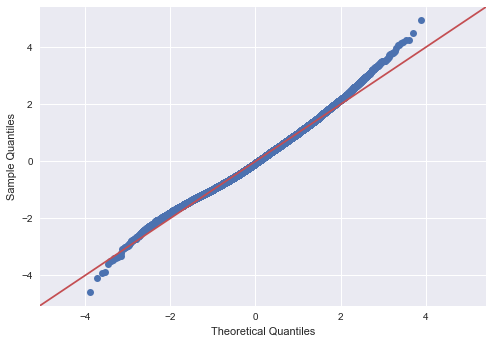

In [461]:
#Our R^2 has gone down a huge amount, but the model is quite a it simpler. 

#Additionally, our normality seems to have improved a tremendous amount
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Cross Validation

In [440]:
#now let's take a look at the MSE for this model vs the old model using 5-fold cross-validation

np.random.seed(10)
from sklearn.metrics import mean_squared_error

y = kcdf_4["price"]
X = kcdf_4.drop(["price"], axis=1)


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error")

new_mse = int(np.mean(cv_5_results))
new_mse

-15808131057

In [441]:
#and let's compare it to the MSE for the older, more complex model

y = kcdf_3["price"]
X = kcdf_3.drop(["price"], axis=1)


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error")

old_mse = int(np.mean(cv_5_results))
old_mse

-9741912036

In [442]:
new_mse < old_mse

True

In [443]:
#The MSE is better for our more complex model. So let's stick with that, given it also has a much higher R^2!

# Step 5. iNterpert

* Ultimately the final model was able to explain roughly 80% of the variation in the response variable around its mean with high confidence (low pvalues for all predictors).
* However, in order to achieve this level of accuracy and maintain our assumptions of normality and homoscedasticity, we had to limit the model data for houses under 1.25M dollars in price. The model still makes use of the vast majority of data (~96%), but will limited in accuracy for prices below that threshold.
* The final model had 71 predictors, mostly zipcodes. I worried that I might be overfitting the model, so I used Recursive Feature Elemination to fit a model with 30 predictors, which lowered the R^2 and raised the mean squared error, suggesting our inital model with more predictors was superior. However, it is important to note that the second model fit our normality assumption better, so it was ultimately a big trade off.
* Zipcodes were ultimately the largest factor in determining house price. Many of them had large coefficients. 
* The biggest non-zipcode predictor was sqft_living, based on the magnitude of the coefficent.

# **Thanks for reading!** 

Noah X. Deutsch